In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
path='automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [22]:
# melihat banyaknya data
len(df)

201

In [39]:
print(df["engine-size"].values)



[130 130 152 109 136 136 136 136 131 108 108 164 164 164 209 209 209  61
  90  90  90  90  98  90  90  90  98 122 156  92  92  79  92  92  92  92
 110 110 110 110 110 110 111 119 258 258 326  91  91  91  91  91  70  70
  70  80 122 122 122 122 122 122 140 134 183 183 183 183 234 234 308 304
 140  92  92  92  98 110 122 156 156 156 122 122 110 110  97 103  97  97
  97  97  97  97  97  97 120 120 181 181 181 181 181 181 120 152 120 152
 120 152 120 152 120 152 134  90  98  90  90  98 122 156 151 194 194 194
 132 132 121 121 121 121 121 121  97 108 108 108 108 108 108 108 108 108
 108 108  92  92  92  92  92  92  98  98 110 110  98  98  98  98  98  98
  98 146 146 146 146 146 146 122 110 122 122 122 171 171 171 161  97 109
  97 109 109  97 109 109 109 136  97 109 141 141 141 141 130 130 141 141
 173 145 141]


In [23]:
# Melihat semua judul kolom tabel (fitur)
print(df.columns.values)

['symboling' 'normalized-losses' 'make' 'aspiration' 'num-of-doors'
 'body-style' 'drive-wheels' 'engine-location' 'wheel-base' 'length'
 'width' 'height' 'curb-weight' 'engine-type' 'num-of-cylinders'
 'engine-size' 'fuel-system' 'bore' 'stroke' 'compression-ratio'
 'horsepower' 'peak-rpm' 'city-mpg' 'highway-mpg' 'price' 'city-L/100km'
 'horsepower-binned' 'diesel' 'gas']


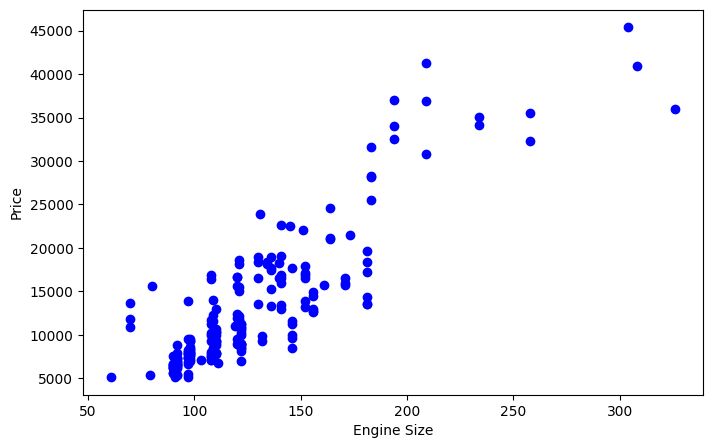

In [24]:
# plotting hubungan antara "engine-size" dan "price"
ez, prc= (df["engine-size"].values, df["price"].values)
plt.figure(figsize=(8,5))
plt.plot(ez,prc,'bo')
plt.ylabel("Price")
plt.xlabel("Engine Size")
plt.show()


In [25]:
# cek koefisien korelasi
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [26]:
# menghitung intercept (a) dan Slope (b)
# modul for linear regression
from sklearn.linear_model import LinearRegression

# linear regression object
lm = LinearRegression()

In [27]:
# y = a + bx
# menghitung intercept (a) dan Slope (b)

x_par = df[["engine-size"]]
y_par = df["price"]



lm.fit(x_par, y_par)
a = lm.intercept_
b = lm.coef_
print(a,b)

-7963.338906281046 [166.86001569]


In [28]:
# membuat model persamaan linear y = a + bx
def model_linear(x,a,b):
     return a + (b*x)
    

In [29]:
# menghitung nilai y_prediksi
y_prediksi = model_linear(x_par,a,b)
y_prediksi

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228
...,...
196,15563.923306
197,15563.923306
198,20903.443808
199,16231.363369


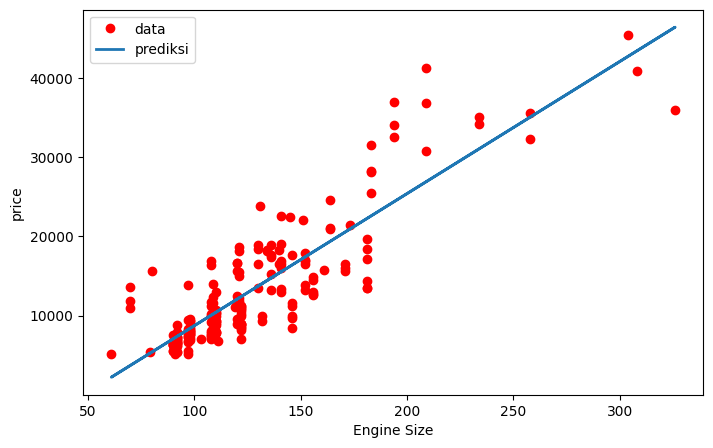

In [30]:
# plotting data dan prediksi
plt.figure(figsize=(8,5))
plt.plot(ez, prc,'ro', label='data')
plt.plot(ez,y_prediksi,linewidth=2.0,label='prediksi')
plt.legend(loc='best')
plt.ylabel('price')
plt.xlabel('Engine Size')
plt.show()

In [31]:
#  Evaluasi akurasi model regresi
# menentukan data latih dan data uji secara acak (split test)
i = np.random.rand(len(df)) < 0.8
x_latih = x_par[i]
y_latih = prc[i]
x_uji = ez[~i]
y_uji = prc[~i]

In [32]:
#  menghitung a (intercept) dan b (slope) dari data latih
lm.fit(x_latih, y_latih)
a_latih = lm.intercept_
b_latih = lm.coef_
print(a_latih,b_latih)

-9133.708986415773 [175.33303028]


In [33]:
# menghitung prediksi dari data uji
y_prediksi = model_linear(x_uji, a_latih, b_latih)

In [34]:
# menghitung MAE, MSE, RMSE
mae = np.mean(np.absolute(y_uji - y_prediksi))
mse = np.mean((y_uji - y_prediksi)**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error = " + str(round(mae,4)))
print("Mean Squared Error = " + str(round(mse,4)))
print("Root Mean Squared Error = " + str(round(rmse,4)))



Mean Absolute Error = 3073.6415
Mean Squared Error = 17566240.2887
Root Mean Squared Error = 4191.2099
